Ant Colony - Laboratório IA
Pedro Santos e Vinicius Nascimento

In [13]:
from City import City
from Ridge import Ridge
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import csv

# Variáveis Globais
alpha = 1
beta = 1
Q_rate = 1.0
p_rate = 0,5
cities_array = []
ants = []
ridges = np.empty((33, 33), dtype=Ridge) # Vai da cidade 0 até a cidade 32
best_routes = []
worst_routes = []
median_routes = []

In [14]:
# Construindo o vetor de cidades, e instanciando os objetos City para salvar as coordenadas de cada cidade

def build_cities():
    global cities_array
    with open('C:\\Users\\pedro\\OneDrive\\Documentos\\CEFETMG\\2023.1\\Inteligência Artificial\\Laboratório\\AI-Algorithms\\Ant Colony - Teste\\Colonia.csv', "r") as csvfile:
        filereader = csv.reader(csvfile, delimiter=';')
        next(filereader, None)
        for row in filereader:
            id, x, y = row
            id = int(id)
            x = float(x)
            y = float(y)
            cities_array.append(City(id, x, y))

In [15]:
# Construindo o vetor de formigas, cada posição do vetor equivale a uma formiga, e guarda as cidades vistadas por ela

def build_ants_initial_position():
    global ants, cities_array
    for i in cities_array:
        ants.append([i.get_id()])

In [16]:
# Cálculo da distância entre duas cidades usando função euclidiana

def distance(x1:float,x2:float,y1:float,y2:float) -> float:
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)

In [17]:
# Criando uma matriz de arestas para salvar todas as distâncias entre todas as cidades

def build_ridges():
    global ridges, cities_array

    for i in range(len(ridges)):
        for j in range(len(ridges)):
            if i != j:
                ridges[i][j] = Ridge(i, j, 1, distance(cities_array[i].get_x(), cities_array[j].get_x(), cities_array[i].get_y(), cities_array[j].get_y()))
            else:
                ridges[i][j] = Ridge(i, j, 1, 0)

In [18]:
# Calcular a probabilidade de cada formiga ir para cada cidade

def propability(possible_cities:list, ant_cities:list) -> list :

    sum = 0
    cities_propability = []

    # print("Caminho Percorrido: ")
    # print(ant_cities)

    # print("Possíveis próximas cidades: ")
    # print(possible_cities)

    # Cidade atual da formiga
    present_city = ant_cities[-1]

    # Calculando o somatório das possíveis rotas
    for i in range(len(possible_cities)):

        ridge = ridges[present_city][possible_cities[i]]
        ph = ((ridge.get_pheromone())**alpha) * ((ridge.get_heuristic())**beta)
        sum = sum + ph

    # Calculando a propabilidade de cada rota
    for i in range(len(possible_cities)):

        prob = 0

        ridge = ridges[present_city][possible_cities[i]]
        p = ridge.get_pheromone()
        h = ridge.get_heuristic()

        prob = ((p)**alpha) * ((h)**beta) / sum

        cities_propability.append(prob)

    return cities_propability



In [19]:
# Calcular a próxima cidade a ser visitada por cada formiga

def select_next_city():
    global ants, cities_array, ridges

    # Printando a solução parcial
    # print("Solução Parcial Geral: ")
    # print(ants[1:])
    # print("\n")

    # Percorrendo o vetor de formigas
    for i in range(1, len(ants), 1):

        possible_cities = []
        next_city = 0        

        # Percorrendo o vetor de cidades para cada fromiga
        for j in range(1, len(cities_array), 1):

             # Checando se a cidade j já foi visitada pela formiga i
            if cities_array[j].get_id() not in ants[i]:
                possible_cities.append(cities_array[j].get_id())
        
        # Calculando a probabilidade para cada cidade não visitada pela formiga i
        probabilities = propability(possible_cities, ants[i])

        # Linkar a cidade com a sua probabilidade de ser visitada, tupla (cidade, probabilidade)
        city_probability = []
        for j in range(0, len(possible_cities), 1):
            city_probability.append((possible_cities[j], probabilities[j]))

        # print("Probabilidae de cada rota: ")
        # print(city_probability)

        # Aplicando o método da roleta para selecionar a próxima cidade
        sum_city_probability = []
        for j in range(0, len(city_probability), 1):
            if j != 0:
                sum_city_probability.append(city_probability[j][1] + sum_city_probability[j-1])
            else:
                sum_city_probability.append(city_probability[j][1])

        # print("Vetor Somatório das probabilidades: ")
        # print(sum_city_probability)

        r = random.uniform(0, 1)

        for j in range(0, len(sum_city_probability), 1):
            if r < sum_city_probability[j]:
                next_city = possible_cities[j]
                break

        # print("Próxima Cidade Escolhida: ", next_city)
        # print("Número Sorteado: ", r)
        # print("\n")

        # Acrescentando a cidade escolhida na lista de cidades visitadas da formiga i
        ants[i].append(next_city)
        



In [20]:
# Realizar a atualização dos feromônios de cada aresta

def update_pheromones():

    global ants, ridges

    d_cities = 0
    d_route = 0
    distances = []
    distances.append(0)

    # Calcular a distância percorrida por cada formiga
    for i in range(1, len(ants), 1):
        for j in range(len(ants[i])):
            if j != len(ants[i]) - 1:

                # Calculando as distâncias das arestas intermediárias
                origin = ants[i][j]
                destiny = ants[i][j+1]
                d_cities = ridges[origin][destiny].get_heuristic()
                d_route = d_route + d_cities

        # Calculando a distância da cidade final para a cidade inicial
        origin = ants[i][-1]
        destiny = ants[i][0]
        d_cities = ridges[origin][destiny].get_heuristic()
        d_route = d_route + d_cities

            
        distances.append(d_route)

    # Salvando a melhor distância, a pior distância e a média das distâncias
    distances_sorted = distances[1:].copy()
    distances_sorted.sort()
    best_routes.append(distances_sorted[0])
    worst_routes.append(distances_sorted[-1])
    median_routes.append(np.mean(distances_sorted))

    # Printando as distâncias percorridas
    # print("Distâncias Percorridas: ")
    # print(distances[1:])
    # print("\n")

    # Printando os feromônios antes da atualização
    # print("Feromônios Antes: ")
    # for i in range(1, 33, 1):
    #     for j in range(1, 33, 1):
    #         print(ridges[i][j].get_pheromone(), end=" ")
    #     print("\n")

    # Realizando a evaporação dos feromônios
    for i in range(1, 33, 1):
        for j in range(1, 33, 1):
            r = ridges[i][j]

            # Calculando taxa de evaporação na aresta ij
            evaporation = (1/2) * r.get_pheromone()

            # Atualizando o valor do feromônio
            r.pheromone = evaporation

    # Calculando a taxa de depósito e realizando o depósito dos feromônios de cada aresta
    for i in range(1, len(ants), 1):
        for j in range(len(ants[i])):
            if j != len(ants[i]) - 1:
                origin = ants[i][j]
                destiny = ants[i][j+1]
                r = ridges[origin][destiny]

                # Calculando a taxa de depósito na aresta j - j+1
                delta_p = 1 / distances[i]

                # Atualizando o valor do feromônio
                new_p_value = r.get_pheromone() + delta_p
                r.pheromone = new_p_value


    # A aresta 3-5 e a 5-3 estão sendo consideradas arestas diferentes em relação ao número de feromônios -> REVISAR
                

    # Printando os feromônios depois da atualização
    # print("Feromônios Depois: ")
    # for i in range(1, 33, 1):
    #     for j in range(1, 33, 1):
    #         print(ridges[i][j].get_pheromone(), end=" ")
    #     print("\n")


    

In [21]:
def main():

    global ridges, cities_array, ants, best_routes, worst_routes, median_routes

    # Limpando o vetor de cidades
    cities_array.clear()

    # Construindo o vetor de cidades
    build_cities()

    # Construindo a matriz de arestas
    build_ridges()

    # Loop de épocas -> Mudar número de épocas
    for i in range(100):

        # print("ITERAÇÃO ", i)
        # print("\n")

        # Limpando o vetor de formigas
        ants.clear()

        # Construindo o vetor de formigas
        build_ants_initial_position()

        # Calcular o caminho percorrido pela formiga, cidade a cidade -> Alterar o range (4 = 5 cidades | 31 = 32 cidades)
        for i in range(31):
            
            # Seleciona a próxima cidade a ser visitada para todas as formigas
            select_next_city()

        # Printando a solução parcial geral
        # print("Solução Parcial Geral: ")
        # print(ants[1:])
        # print("\n")

        # Realizar a atualização dos feromônios em cada aresta
        update_pheromones()

        # Printando melhor rota, pior rota, e média das rotas
        # print("Melhor Rota: ", best_routes[-1])
        # print("Pior Rota: ", worst_routes[-1])
        # print("Média das Rotas: ", median_routes[-1])
        # print("\n")


    # Printando melhor rota inicial e final
    print("Melhor Rota Inicial: ", best_routes[0])
    print("Melhor Rota Final: ", best_routes[-1])
    
    # Plotando gráfico com as melhores rotas, piores rotas, e médias das rotas de todas as épocas
    plt.plot(best_routes)
    plt.plot(worst_routes)
    plt.plot(median_routes)

    print(best_routes)
    print(worst_routes)

    # Limpando vetores de rotas
    best_routes.clear()
    worst_routes.clear()
    median_routes.clear()
    


Melhor Rota Inicial:  191.76323446482996
Melhor Rota Final:  238.02966198909127
[191.76323446482996, 197.99153276848565, 195.15328222614204, 190.5893031664299, 186.64557358400486, 190.17241385386095, 209.6433993748849, 214.72577269227105, 220.59670447494733, 197.48659237960103, 217.91743393534682, 216.20031004244828, 222.6291529824078, 228.76395713431572, 213.3391647334599, 240.86271417317823, 238.77767105601612, 222.26029800744732, 236.69239876880548, 239.7291615403424, 231.9747656786106, 234.08434652424566, 225.29096298975597, 229.03327201684155, 236.5946475899665, 238.2223982756097, 238.02122124015847, 237.39238260825093, 233.3227501796991, 219.29355049909498, 228.06026384193922, 225.89302955061146, 234.25670956111563, 227.9033575137525, 238.12427893224796, 224.7410136108042, 234.34202308331908, 238.58594572895115, 235.38938329423885, 243.04650474772475, 235.38343487928455, 229.1619737874724, 231.22708284625398, 231.28071774705091, 235.10763574283433, 236.43698137621908, 223.3150374

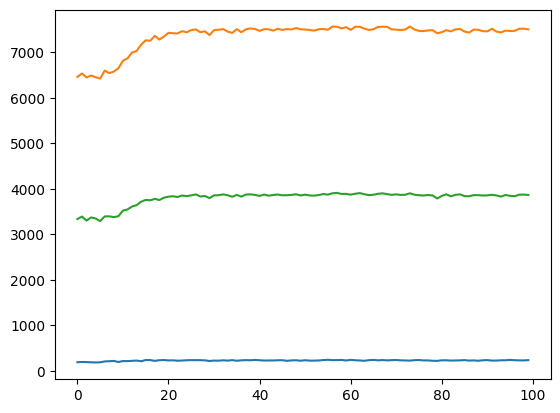

In [22]:
main()